# Midterm (MACS 30150), February 10, 2020 [20 points total]
### Ruoyun Tan
You will have an hour and fifty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `data/hh_inc_synth.txt` and images `images/hist_inc_2.png`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

# 1. Numerical Integration [10 points total]
Assume that the distribution of household income (in U.S. dollars \\$) is characterized by the two-parameter gamma (GA) distribution (similar to the log normal distribution). The following is the probability density function (PDF) of the gamma (GA) distribution, which tells you the probability density of variable $x$ for given values of parameters $\alpha$ and $\beta$.

\begin{equation*}
\begin{split}
&\text{(GA):}\quad f(x;\alpha,\beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}e^{-\frac{x}{\beta}}, \quad x>0, \:\alpha,\beta>0 \\
&\quad\quad \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt
\end{split}
\end{equation*}

Some code for the PDF of the gamma (GA) distribution is the following.

In [61]:
import numpy as np
import scipy.special as spc

def GA_pdf(xvals, alpha, beta):
    '''
    --------------------------------------------------------------------
    Returns the PDF values from the two-parameter gamma (GA)
    distribution. See McDonald and Xu (1995).

    (GA): f(x; alpha, beta) = (1 / ((beta ** alpha) *
        spc.gamma(alpha))) * (x ** (alpha - 1)) * (e ** (-x / beta))
    x in [0, infty), alpha, beta > 0
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, values in the support of gamma distribution
    alpha = scalar > 0, gamma distribution parameter
    beta  = scalar > 0, gamma distribution parameter

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        spc.gamma()

    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals = (N,) vector, pdf values from gamma distribution
               corresponding to xvals given parameters alpha and beta

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    pdf_vals = \
        np.float64((1 / ((beta ** alpha) * spc.gamma(alpha))) *
                   (xvals ** (alpha - 1)) * np.exp(-xvals / beta))

    return pdf_vals

As a final suggestion for numerical approximations of integrals that use this `GA_pdf()` function, you can integrate this with a `lambda function` in which the `alpha` and `beta` are hard coded. For parts (b) and (c), one approach might be to define a `lambda` function like the following and use that as your input function for the `quad` command in part (c) or any of your Newton-Cotes methods in part (b).

In [62]:
GApdf = lambda x: GA_pdf(x, alpha_1a, beta_1a)

## 1a) Plot the GA distribution of income [2 points]
Assume that the GA distribution coefficient values are $\alpha=1.23$ and $\beta=54,649.9$. Use Python to plot the GA PDF of income using 1,000 equally spaced income values between `1e-7` and \\$350,000 and using the `GA_pdf()` function above. Make sure your plot has an $x$-axis labeled "income" and a $y$-axis labeled "density".

Text(0, 0.5, 'density')

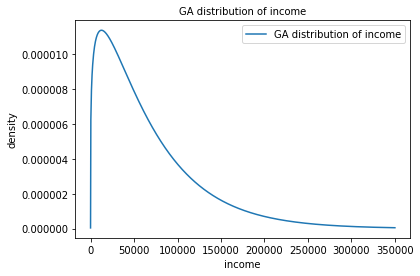

In [6]:
from matplotlib import pyplot as plt

alpha_1a = 1.23
beta_1a = 54649.9
GApdf = lambda x: GA_pdf(x, alpha_1a, beta_1a)
xvals = np.linspace(1e-7, 350000, 1000)
probs = GApdf(xvals)

plt.plot(xvals, probs, label="GA distribution of income")
plt.legend(loc='upper right')
plt.title("GA distribution of income", fontsize=10)
plt.xlabel('income')
plt.ylabel('density')

## 1b) Midpoint, trapezoid, and Simpson's rule [5 points]
Assuming $\alpha=1.23$ and $\beta=54,649.9$ in the gamma (GA) distribution, and using $N=30$ equally spaced bins, approximate the percent of the population with an income less than \\$75,000 using the midpoint rule, trapezoid rule, and Simpson's rule. The analytical expression for this percentage is given by the following integral.

$$ \int_0^{75000}f(x|\alpha,\beta)dx $$

Report your values for this approximated itegral for the midpoint rule, trapezoid rule, and Simpson's rule, respectively.

In [7]:
def midpoint(g, a, b, N):
    bin_width = (b - a) / N
    midpoint_int = 0
    for i in range(N):
        x = a + (2 * i + 1) * (b - a)/ (2 * N)
        midpoint_int += g(x) * bin_width
    
    return midpoint_int

def trapezoid(g, a, b, N):
    bin_width = (b - a) / N
    trapezoid_int = g(a) + g(b)
    for i in range(1, N):
        xi = a + i  * bin_width
        trapezoid_int += 2 * g(xi)
    trapezoid_int = trapezoid_int * bin_width / 2 
    
    return trapezoid_int

def simpsons(g, a, b, N):
    bin_width = (b - a) / (2 * N)
    simpsons_int = g(a) + g(b)
    
    for i in range(1, 2 * N, 2):
        xi = a + bin_width  * i 
        simpsons_int += g(xi) * 4
    for i in range(2, (2 * N - 1), 2):
        xi = a + bin_width * i
        simpsons_int += g(xi) * 2
    
    simpsons_int = simpsons_int * bin_width / 3
    
    return simpsons_int

In [67]:
alpha_1b = 1.23
beta_1b = 54649.9
GApdf = lambda x: GA_pdf(x, alpha_1b, beta_1b)
N = 30
a = 0
b = 75000
print("The approximated itegral for the midpoint rule is", midpoint(GApdf, a, b, N))
print("So the percentage calculated with the midpoint rule is", midpoint(GApdf, a, b, N) * 100, "%")
print("The approximated itegral for the trapezoid rule is", trapezoid(GApdf, a, b, N))
print("So the percentage calculated with the trapezoid rule is", trapezoid(GApdf, a, b, N) * 100, "%")
print("The approximated itegral for the Simpson's rule is", simpsons(GApdf, a, b, N))
print("So the percentage calculated with the Simpson's rule is", simpsons(GApdf, a, b, N) * 100, "%")

The approximated itegral for the midpoint rule is 0.6658937754128379
So the percentage calculated with the midpoint rule is 66.5893775412838 %
The approximated itegral for the trapezoid rule is 0.6565135570466718
So the percentage calculated with the trapezoid rule is 65.65135570466718 %
The approximated itegral for the Simpson's rule is 0.6627670359574492
So the percentage calculated with the Simpson's rule is 66.27670359574492 %


## 1c) Use Gaussian quadrature to approximate the integral [3 points]
Use gaussian quadrature using the `scipy.integrate.quad()` command to approximate the percent of the population that earns less than \\$75,000 assuming that the population income is distributed according to the gamma (GA) distribution with parameter values $\alpha=1.23$ and $\beta=54,649.9$. Report your percentage that you calculated using Gaussian quadrature.

In [11]:
import scipy.integrate

print("The approximated integral using Python Gaussian quadrature command is", scipy.integrate.quad(GApdf, a, b)[0])
print("So the percentage calculated in this way is", scipy.integrate.quad(GApdf, a, b)[0] * 100, "%")

The approximated integral using Python Gaussian quadrature command is 0.6646972256281289
So the percentage calculated in this way is 66.46972256281289 %


We can see that the approximated values for the three rules above are quite close to the value approximated by using Gaussian quadrature.

# 2. Generalized method of moments estimation [10 points total]
Suppose that your friend at the Bureau of Labor Statistics told you the following four moments (statistics) of the U.S. household income distribution in the third column of the table.

| Income range | Number of households |Percent of population |
| :--- | ---: | :---: |
| Less than \\$10,000 | 9,233 | 7.6\% |
| \\$10,000 to \\$100,000 | 86,431 | 71.4\% |
| \\$100,000 to \\$160,000 | 16,347 | 13.5\% |
| Greater than \\$160,000 | 9,074 | 7.5\% |

Assume that these incomes are generated by the lognormal distribution, specified by the following probability density function (PDF).

\begin{equation*}
\begin{split}
&(LN) \quad f(x|\mu,\sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-\frac{[\ln(x)] - \mu]^2}{2\sigma^2}} \\
&\quad\quad\quad\text{for}\quad x>0, \quad -\infty<\mu<\infty, \quad\text{and}\quad \sigma>0
\end{split}
\end{equation*}

One could plot a histogram of the information in the table above using the following code that imports the original data `hh_inc_synth.txt` from which the histogram was generated. (NOTE that you will not need to use the original data except for plotting fitted distributions over this histogram using the exact code below.)

Text(0, 0.5, 'Density (area sums to 1)')

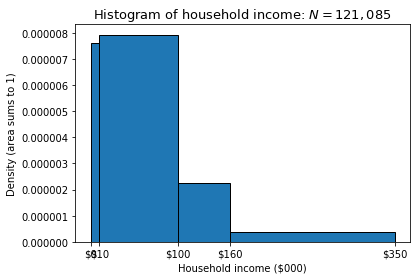

In [12]:
import numpy as np
import matplotlib.pyplot as plt

hh_inc_synth = np.loadtxt('data/hh_inc_synth.txt')

bin_bound_list = [0, 10000, 100000, 160000, 350000]
bin_widths = np.array([10000, 90000, 60000, 190000])
N = len(hh_inc_synth)
weight_inc = np.zeros(N)
in_bin_1 = hh_inc_synth <= 10000
in_bin_2 = (hh_inc_synth > 10000) * (hh_inc_synth <= 100000)
in_bin_3 = (hh_inc_synth > 100000) * (hh_inc_synth <= 160000)
in_bin_4 = hh_inc_synth > 160000
weight_inc[in_bin_1] = 1 / (N * 10000)
weight_inc[in_bin_2] = 1 / (N * 90000)
weight_inc[in_bin_3] = 1 / (N * 60000)
weight_inc[in_bin_4] = 1 / (N * 190000)

n, bin_cuts, patches = \
    plt.hist(hh_inc_synth, bin_bound_list, edgecolor='black',
             weights=weight_inc, label='data histogram')
plt.title(r'Histogram of household income: $N=121,085$',
          fontsize=13)
plt.xticks(np.array([0, 10000, 100000, 160000, 350000]),
           ('$0', '$10', '$100', '$160', '$350'))
plt.xlabel(r'Household income (\$000)')
plt.ylabel(r'Density (area sums to 1)')

Some python code for the PDF of the lognormal distribution is the following.

In [13]:
def LN_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    This function gives the PDF of the lognormal distribution for xvals
    given mu and sigma

    (LN): f(x; mu, sigma) = (1 / (x * sigma * sqrt(2 * pi))) *
            exp((-1 / 2) * (((log(x) - mu) / sigma) ** 2))
            x in [0, infty), mu in (-infty, infty), sigma > 0
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, data
    mu    = scalar, mean of the ln(x)
    sigma = scalar > 0, standard deviation of ln(x)

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals        = (N,) vector, probability of each observation given
                      the parameter values

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    pdf_vals = np.float64(((1 / (np.sqrt(2 * np.pi) * sigma * xvals)) *
                          np.exp((-1.0 / 2.0) *
                          (((np.log(xvals) - mu) / sigma) ** 2))))

    return pdf_vals

The following will help you to calculate your model moments. Using numerical integration of the PDF of the log normal distribution in your GMM minimization problem takes too long. The following method uses the cummulative distribution function (CDF). For a given $\mu$ and $\sigma$ of the log normal distribution, you can calculate the percent of a distribution between a lower bound `LB` and upper bound `UB` of income using the following code.

In [ ]:
import scipy.stats as sts

pct_LBtoUB = (sts.lognorm.cdf(UB, s=sigma, scale=np.exp(mu)) -
              sts.lognorm.cdf(LB, s=sigma, scale=np.exp(mu)))

## 2a) Plot a log normal distribution with the histogram (2 points)
Plot a log normal distribution with mean $\mu=11.5$ and $\sigma=0.9$ using the `LN_pdf()` code for the lognorm PDF above. Plot the log normal distribution over the histogram using the histogram code above. Make sure to use the same `x`-axis and `y`-axis labels as in the histogram plot above. Make sure to put a legend in the upper-right corner.

/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


Text(0, 0.5, 'Density (area sums to 1)')

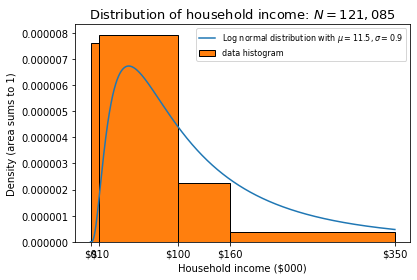

In [69]:
mu = 11.5
sigma = 0.9
xvals = np.linspace(0, 350000, 1000000)
probs = LN_pdf(xvals, mu, sigma)
plt.plot(xvals, probs, label='Log normal distribution with $\mu = 11.5, \sigma = 0.9$')
n, bin_cuts, patches = \
    plt.hist(hh_inc_synth, bin_bound_list, edgecolor='black',
             weights=weight_inc, label='data histogram')
plt.legend(loc='upper right', fontsize=8)
plt.title(r'Distribution of household income: $N=121,085$',
          fontsize=13)
plt.xticks(np.array([0, 10000, 100000, 160000, 350000]),
           ('$0', '$10', '$100', '$160', '$350'))
plt.xlabel(r'Household income (\$000)')
plt.ylabel(r'Density (area sums to 1)')

## 2b) GMM estimation with identity weighting matrix (5 points)
Using the four moments in the table above fit the log normal distribution to the income data using GMM and the identity matix for the optimal weighting matrix. More specifically, estimate $\mu$ and $\sigma$ from the log normal distribution to match the percentage moments in the third column of the table above with the income bin cutoffs listed in the first column of the table above. Report your estimates $\mu_{GMM1}$ and $\sigma_{GMM1}$, criterion function value, data moments, and model moments at your estimated parameter values. Plot your estimated log normal distribution on top of the histogram of the data given in the code above. [**HINT:** Use the log normal CDF approach described above to calculate your model moments. Using numerical integrals will take too long.]

In [70]:
import scipy.stats as sts


def data_moments(xvals):
    data_percent1 = xvals[xvals < 10000].shape[0] / xvals.shape[0]
    data_percent2 = (xvals[(xvals >= 10000) & (xvals < 100000)].shape[0] / xvals.shape[0])
    data_percent3 = (xvals[(xvals >= 100000) & (xvals < 160000)].shape[0] / xvals.shape[0])
    data_percent4 = (xvals[xvals >= 160000].shape[0] / xvals.shape[0])

    return data_percent1, data_percent2, data_percent3, data_percent4


def model_moments(mu, sigma):
    model_percent1 = sts.lognorm.cdf(10000, s=sigma, scale=np.exp(mu))
    model_percent2 = (sts.lognorm.cdf(100000, s=sigma, scale=np.exp(mu)) -
              sts.lognorm.cdf(10000, s=sigma, scale=np.exp(mu)))
    model_percent3 = (sts.lognorm.cdf(160000, s=sigma, scale=np.exp(mu)) -
              sts.lognorm.cdf(100000, s=sigma, scale=np.exp(mu)))
    model_percent4 = 1 - sts.lognorm.cdf(160000, s=sigma, scale=np.exp(mu))
    
    return model_percent1, model_percent2, model_percent3, model_percent4


def err_vec(xvals, mu, sigma, simple):
    data_percent1, data_percent2, data_percent3, data_percent4 = data_moments(xvals)
    data_mts = np.array([[data_percent1], [data_percent2], [data_percent3], [data_percent4]])
    model_percent1, model_percent2, model_percent3, model_percent4 = model_moments(mu, sigma)
    model_mts = np.array([[model_percent1], [model_percent2], [model_percent3], [model_percent4]])
    if simple:
        err_vec = model_mts - data_mts 
    else:
        err_vec = (model_mts - data_mts) / data_mts
    
    return err_vec


def criterion(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = err.T @ W @ err 
    
    return crit_val

In [75]:
import scipy.optimize as opt

mu_init = 11.5
sig_init = 0.9
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(4)
gmm_args = (hh_inc_synth, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args), tol=1e-14, method='L-BFGS-B', bounds=((1e-18, None), (1e-18, None)))
mu_GMM, sig_GMM = results.x

print('mu_GMM1 =', mu_GMM, ' sig_GMM1 =', sig_GMM)
print("The value of GMM criterion function at the estimated parameter values:", results.fun)

model_percent1, model_percent2, model_percent3, model_percent4 = model_moments(mu_GMM, sig_GMM)
data_percent1, data_percent2, data_percent3, data_percent4 = data_moments(hh_inc_synth)
print("The model moments are: Less than $10000 =", model_percent1, ", Between $10000 and $100000 =", model_percent2, ", Between $100000 and $160000 =", model_percent3, ", More than $160000 =", model_percent4)
print("The data moments are: Less than $10000 =", data_percent1, ", Between $10000 and $100000 =", data_percent2, ", Between $100000 and $160000 =", data_percent3, ", More than $160000 =", data_percent4)

mu_GMM1 = 10.622661631093175  sig_GMM1 = 0.9706306559006918
The value of GMM criterion function at the estimated parameter values: [[0.0810807]]
The model moments are: Less than $10000 = 0.07282697934948604 , Between $10000 and $100000 = 0.7476544740748076 , Between $100000 and $160000 = 0.09897525116330241 , More than $160000 = 0.08054329541240401
The data moments are: Less than $10000 = 0.07625221951521659 , Between $10000 and $100000 = 0.7138043523144898 , Between $100000 and $160000 = 0.13500433579716728 , More than $160000 = 0.07493909237312632


The data moments match with the percentage in the table above.

The model moments and the data moments are close.

/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


Text(0, 0.5, 'Density (area sums to 1)')

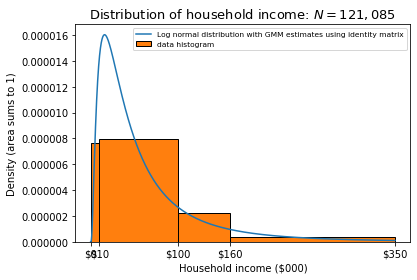

In [76]:
xvals = np.linspace(0, 350000, 1000000)
probs = LN_pdf(xvals, mu_GMM, sig_GMM)
plt.plot(xvals, probs, label='Log normal distribution with GMM estimates using identity matrix')
n, bin_cuts, patches = \
    plt.hist(hh_inc_synth, bin_bound_list, edgecolor='black',
             weights=weight_inc, label='data histogram')
plt.legend(loc='upper right', fontsize=7.5)
plt.title(r'Distribution of household income: $N=121,085$',
          fontsize=13)
plt.xticks(np.array([0, 10000, 100000, 160000, 350000]),
           ('$0', '$10', '$100', '$160', '$350'))
plt.xlabel(r'Household income (\$000)')
plt.ylabel(r'Density (area sums to 1)')

## 2c) GMM estimation with two-step optimal weighting matrix (3 points)
Using the four moments in the table above fit the log normal distribution to the income data using GMM and the two-step optimal weighting matrix. More specifically, estimate $\mu$ and $\sigma$ from the log normal distribution to match the percentage moments in the third column of the table above with the income bin cutoffs listed in the first column of the table above. Report your estimates $\mu_{GMM2}$ and $\sigma_{GMM2}$, criterion function value, data moments, and model moments at your estimated parameter values. Plot your estimated log normal distribution on top of the histogram of the data given in the code above. [**HINT:** Use the log normal CDF approach described above to calculate your model moments. Using numerical integrals will take too long.]

In [31]:
def get_Err_mat(xvals, mu, sigma, simple):
    R = 4
    N = len(xvals)
    Err_mat = np.zeros((R, N))
    model_percent1, model_percent2, model_percent3, model_percent4 = model_moments(mu, sigma)
    if simple:
        xvals_in_grp1 = (xvals < 10000)
        Err_mat[0, :] = xvals_in_grp1 - model_percent1
        xvals_in_grp2 = (xvals >= 10000) & (xvals < 100000)
        Err_mat[1, :] = xvals_in_grp2 - model_percent2
        xvals_in_grp3 = (xvals >= 100000) & (xvals < 160000)
        Err_mat[2, :] = xvals_in_grp3 - model_percent3
        xvals_in_grp4 = (xvals >= 160000)
        Err_mat[3, :] = xvals_in_grp4 - model_percent4
    else:
        xvals_in_grp1 = (xvals < 10000)
        Err_mat[0, :] = (xvals_in_grp1 - model_percent1) / model_percent1
        xvals_in_grp2 = (xvals >= 10000) & (xvals < 100000)
        Err_mat[1, :] = (xvals_in_grp2 - model_percent2) / model_percent2
        xvals_in_grp3 = (xvals >= 100000) & (xvals < 160000)
        Err_mat[2, :] = (xvals_in_grp3 - model_percent3) / model_percent3
        xvals_in_grp4 = (xvals >= 160000)
        Err_mat[3, :] = (xvals_in_grp4 - model_percent4) / model_percent4
    
    return Err_mat

In [35]:
import numpy.linalg as lin

Err_mat = get_Err_mat(hh_inc_synth, mu_GMM, sig_GMM, simple=False)
VCV = (1 / hh_inc_synth.shape[0]) * (Err_mat @ Err_mat.T)
W = lin.inv(VCV)
print(W)

[[7.08733883e+12 7.27598557e+13 9.63202291e+12 7.83827132e+12]
 [7.27598557e+13 7.46965361e+14 9.88840261e+13 8.04690597e+13]
 [9.63202291e+12 9.88840261e+13 1.30903669e+13 1.06525751e+13]
 [7.83827132e+12 8.04690597e+13 1.06525751e+13 8.66876819e+12]]


In [37]:
params_init = np.array([mu_GMM, sig_GMM])
gmm_args = (hh_inc_synth, W)
results2 = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results2.x
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2)
print("The value of the GMM criterion function at the estimated parameter values:", results2.fun)

mu_GMM2= 11.077899968835615  sig_GMM2= 0.8732392013437974
The value of the GMM criterion function at the estimated parameter values: [[0.13470113]]


In [38]:
model_percent1, model_percent2, model_percent3, model_percent4 = model_moments(mu_GMM2, sig_GMM2)
data_percent1, data_percent2, data_percent3, data_percent4 = data_moments(hh_inc_synth)
print("The model moments are: Less than $10000 =", model_percent1, ", Between $10000 and $100000 =", model_percent2, ", Between $100000 and $160000 =", model_percent3, ", More than $160000 =", model_percent4)
print("The data moments are: Less than $10000 =", data_percent1, ", Between $10000 and $100000 =", data_percent2, ", Between $100000 and $160000 =", data_percent3, ", More than $160000 =", data_percent4)

The model moments are: Less than $10000 = 0.016231707122158028 , Between $10000 and $100000 = 0.674587763283087 , Between $100000 and $160000 = 0.15917381702685196 , More than $160000 = 0.150006712567903
The data moments are: Less than $10000 = 0.07625221951521659 , Between $10000 and $100000 = 0.7138043523144898 , Between $100000 and $160000 = 0.13500433579716728 , More than $160000 = 0.07493909237312632


/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/Users/ruoyuntan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


Text(0, 0.5, 'Density (area sums to 1)')

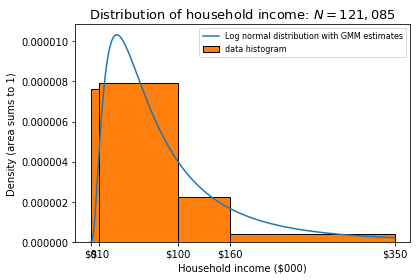

In [60]:
xvals = np.linspace(0, 350000, 10000)
probs = LN_pdf(xvals, mu_GMM2, sig_GMM2)
plt.plot(xvals, probs, label='Log normal distribution with GMM estimates')
n, bin_cuts, patches = \
    plt.hist(hh_inc_synth, bin_bound_list, edgecolor='black',
             weights=weight_inc, label='data histogram')
plt.legend(loc='upper right', fontsize=8)
plt.title(r'Distribution of household income: $N=121,085$',
          fontsize=13)
plt.xticks(np.array([0, 10000, 100000, 160000, 350000]),
           ('$0', '$10', '$100', '$160', '$350'))
plt.xlabel(r'Household income (\$000)')
plt.ylabel(r'Density (area sums to 1)')